Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Combine temperture and relative humidity data files

In [ ]:
#specify file paths
rh_file = '/content/drive/MyDrive/iot/colombo_rh_2012-2018.csv'
temp_file = '/content/drive/MyDrive/iot/colombo_t_2012-2018.csv'

In [ ]:
#load excel sheets in to dataframes
import pandas as pd

temp_data = pd.read_csv(temp_file)
rh_data = pd.read_csv(rh_file)

In [ ]:
#view temperature and humidity data frames

temp_data.head()
rh_data.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


Data Preprocessing

In [ ]:
#rename observed value column
temp_data.rename(columns={'obs_val':'obs_temp_val'}, inplace=True)
rh_data.rename(columns={'obs_val':'obs_rh_val'}, inplace=True)

In [ ]:
#combine temperature and relative humidity data frames

combined_data = pd.merge(temp_data, rh_data, on=['station_id','station_name','year','month','day'])

In [ ]:
combined_data


,station_id,station_name,element_name_x,year,month,day,obs_temp_val,element_name_y,obs_rh_val
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1,RHMAX,91.0
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7,RHMAX,90.0
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6,RHMAX,89.0
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4,RHMAX,89.0
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3,RHMAX,95.0
...,...,...,...,...,...,...,...,...,...
6590,43466,COLOMBO,TMPMAX,2018,12,30,32.8,RHMIN,55.0
6591,43466,COLOMBO,TMPMAX,2018,12,30,32.8,RHMAX,81.0
6592,43466,COLOMBO,TMPMAX,2018,12,31,31.4,RHMAX,82.0
6593,43466,COLOMBO,TMPMAX,2018,12,31,31.4,RHMIN,67.0


In [ ]:
#check for null values

null_values = combined_data[combined_data.isnull().any(axis=1)]
null_values

,station_id,station_name,element_name_x,year,month,day,obs_temp_val,element_name_y,obs_rh_val
60,43466,COLOMBO,TMPMAX,2012,2,30,NaN,RHMAX,NaN
61,43466,COLOMBO,TMPMAX,2012,2,31,NaN,RHMAX,NaN
123,43466,COLOMBO,TMPMAX,2012,4,31,NaN,RHMAX,NaN
185,43466,COLOMBO,TMPMAX,2012,6,31,NaN,RHMAX,NaN
278,43466,COLOMBO,TMPMAX,2012,9,31,NaN,RHMAX,NaN
340,43466,COLOMBO,TMPMAX,2012,11,31,NaN,RHMAX,NaN
431,43466,COLOMBO,TMPMAX,2013,2,29,NaN,RHMAX,NaN
432,43466,COLOMBO,TMPMAX,2013,2,30,NaN,RHMAX,NaN
433,43466,COLOMBO,TMPMAX,2013,2,31,NaN,RHMAX,NaN
495,43466,COLOMBO,TMPMAX,2013,4,31,NaN,RHMAX,NaN


In [ ]:
#drop the rows with null values for relative humidity and/or temperature

combined_data.dropna(inplace=True)


In [ ]:
#create time stamp
combined_data['date'] = pd.to_datetime(combined_data[['year', 'month','day']])

combined_data

,station_id,station_name,element_name_x,year,month,day,obs_temp_val,element_name_y,obs_rh_val,date
0,43466,COLOMBO,TMPMAX,2012,1,1,30.1,RHMAX,91.0,2012-01-01
1,43466,COLOMBO,TMPMAX,2012,1,2,30.7,RHMAX,90.0,2012-01-02
2,43466,COLOMBO,TMPMAX,2012,1,3,31.6,RHMAX,89.0,2012-01-03
3,43466,COLOMBO,TMPMAX,2012,1,4,30.4,RHMAX,89.0,2012-01-04
4,43466,COLOMBO,TMPMAX,2012,1,5,32.3,RHMAX,95.0,2012-01-05
...,...,...,...,...,...,...,...,...,...,...
6590,43466,COLOMBO,TMPMAX,2018,12,30,32.8,RHMIN,55.0,2018-12-30
6591,43466,COLOMBO,TMPMAX,2018,12,30,32.8,RHMAX,81.0,2018-12-30
6592,43466,COLOMBO,TMPMAX,2018,12,31,31.4,RHMAX,82.0,2018-12-31
6593,43466,COLOMBO,TMPMAX,2018,12,31,31.4,RHMIN,67.0,2018-12-31


In [ ]:
#drop month, day, year columns
combined_data.drop(columns=['month','day','year'], inplace= True)
combined_data

,station_id,station_name,element_name_x,obs_temp_val,element_name_y,obs_rh_val,date
0,43466,COLOMBO,TMPMAX,30.1,RHMAX,91.0,2012-01-01
1,43466,COLOMBO,TMPMAX,30.7,RHMAX,90.0,2012-01-02
2,43466,COLOMBO,TMPMAX,31.6,RHMAX,89.0,2012-01-03
3,43466,COLOMBO,TMPMAX,30.4,RHMAX,89.0,2012-01-04
4,43466,COLOMBO,TMPMAX,32.3,RHMAX,95.0,2012-01-05
...,...,...,...,...,...,...,...
6590,43466,COLOMBO,TMPMAX,32.8,RHMIN,55.0,2018-12-30
6591,43466,COLOMBO,TMPMAX,32.8,RHMAX,81.0,2018-12-30
6592,43466,COLOMBO,TMPMAX,31.4,RHMAX,82.0,2018-12-31
6593,43466,COLOMBO,TMPMAX,31.4,RHMIN,67.0,2018-12-31


In [ ]:
#check if there are several rows for the same date
duplicate_dates = combined_data[combined_data.duplicated(subset=['date'], keep=False)]

if duplicate_dates.empty:
    print("No duplicate dates found.")
else:
    print("Duplicate dates found:")
    print(duplicate_dates)

Duplicate dates found:
      station_id station_name element_name_x  obs_temp_val element_name_y  \
1116       43466      COLOMBO         TMPMAX          30.3          RHMAX   
1117       43466      COLOMBO         TMPMAX          30.3          RHMIN   
1118       43466      COLOMBO         TMPMIN          25.2          RHMAX   
1119       43466      COLOMBO         TMPMIN          25.2          RHMIN   
1120       43466      COLOMBO         TMPMAX          29.9          RHMAX   
...          ...          ...            ...           ...            ...   
6590       43466      COLOMBO         TMPMAX          32.8          RHMIN   
6591       43466      COLOMBO         TMPMAX          32.8          RHMAX   
6592       43466      COLOMBO         TMPMAX          31.4          RHMAX   
6593       43466      COLOMBO         TMPMAX          31.4          RHMIN   
6594       43466      COLOMBO         TMPMAX          31.4          RHMAX   

      obs_rh_val       date  
1116        94.0 2015-

In [ ]:
#remove duplicated rows
import pandas as pd

combined_data = combined_data.drop_duplicates(keep="first")


In [ ]:
#check for duplicate rows
duplicated_rows = combined_data[combined_data.duplicated(subset=None, keep=False)]

# Print the duplicated rows, if any
if not duplicated_rows.empty:
    print("Duplicated rows found:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")

No duplicated rows found.


In [ ]:
#drop rows with RHMIN or TMPMIN for element and keep one row per date

import pandas as pd

for date, group in combined_data.groupby('date'):
  if len(group) >1 :
    filtered_group = group[(group['element_name_x']=='TMPMAX') & (group['element_name_y']=='RHMAX')]
    combined_data.drop(group.index.difference(filtered_group.index), inplace=True)

<ipython-input-15-c1a1f9cd1e9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data.drop(group.index.difference(filtered_group.index), inplace=True)


In [ ]:
#define function to convert temperature value to farenhite from celcius
def celsius_to_farenhite(celsius_temp):
  return (celsius_temp*9/5) + 32

combined_data['temp_farenhite'] = celsius_to_farenhite(combined_data['obs_temp_val'])
print(combined_data)

      station_id station_name element_name_x  obs_temp_val element_name_y  \
0          43466      COLOMBO         TMPMAX          30.1          RHMAX   
1          43466      COLOMBO         TMPMAX          30.7          RHMAX   
2          43466      COLOMBO         TMPMAX          31.6          RHMAX   
3          43466      COLOMBO         TMPMAX          30.4          RHMAX   
4          43466      COLOMBO         TMPMAX          32.3          RHMAX   
...          ...          ...            ...           ...            ...   
6580       43466      COLOMBO         TMPMAX          31.4          RHMAX   
6583       43466      COLOMBO         TMPMAX          30.2          RHMAX   
6586       43466      COLOMBO         TMPMAX          31.4          RHMAX   
6589       43466      COLOMBO         TMPMAX          32.8          RHMAX   
6592       43466      COLOMBO         TMPMAX          31.4          RHMAX   

      obs_rh_val       date  temp_farenhite  
0           91.0 2012-01-01  

<ipython-input-16-134e2226b9ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['temp_farenhite'] = celsius_to_farenhite(combined_data['obs_temp_val'])


In [ ]:
#calculate heat index
def calc_heat_index(temperature, relative_humidity):
  HI = (-42.379 + 2.04901523*temperature + 10.14333127*relative_humidity - 0.22475541*temperature*relative_humidity - 0.00683783*temperature*temperature - 0.05481717*relative_humidity*relative_humidity + 0.00122874*temperature*temperature*relative_humidity + 0.00085282*temperature*relative_humidity*relative_humidity - 0.00000199*temperature*temperature*relative_humidity*relative_humidity)
  return HI


In [ ]:
#add calculated heat index to the data frame
combined_data['heat_index'] = calc_heat_index(combined_data['temp_farenhite'],combined_data['obs_rh_val'])
print(combined_data)

      station_id station_name element_name_x  obs_temp_val element_name_y  \
0          43466      COLOMBO         TMPMAX          30.1          RHMAX   
1          43466      COLOMBO         TMPMAX          30.7          RHMAX   
2          43466      COLOMBO         TMPMAX          31.6          RHMAX   
3          43466      COLOMBO         TMPMAX          30.4          RHMAX   
4          43466      COLOMBO         TMPMAX          32.3          RHMAX   
...          ...          ...            ...           ...            ...   
6580       43466      COLOMBO         TMPMAX          31.4          RHMAX   
6583       43466      COLOMBO         TMPMAX          30.2          RHMAX   
6586       43466      COLOMBO         TMPMAX          31.4          RHMAX   
6589       43466      COLOMBO         TMPMAX          32.8          RHMAX   
6592       43466      COLOMBO         TMPMAX          31.4          RHMAX   

      obs_rh_val       date  temp_farenhite  heat_index  
0           91.0 

<ipython-input-18-ce67fb7f46ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['heat_index'] = calc_heat_index(combined_data['temp_farenhite'],combined_data['obs_rh_val'])


In [ ]:
combined_data

,station_id,station_name,element_name_x,obs_temp_val,element_name_y,obs_rh_val,date,temp_farenhite,heat_index
0,43466,COLOMBO,TMPMAX,30.1,RHMAX,91.0,2012-01-01,86.18,106.586916
1,43466,COLOMBO,TMPMAX,30.7,RHMAX,90.0,2012-01-02,87.26,110.222986
2,43466,COLOMBO,TMPMAX,31.6,RHMAX,89.0,2012-01-03,88.88,116.153191
3,43466,COLOMBO,TMPMAX,30.4,RHMAX,89.0,2012-01-04,86.72,107.436420
4,43466,COLOMBO,TMPMAX,32.3,RHMAX,95.0,2012-01-05,90.14,127.316863
...,...,...,...,...,...,...,...,...,...
6580,43466,COLOMBO,TMPMAX,31.4,RHMAX,90.0,2018-12-27,88.52,115.429849
6583,43466,COLOMBO,TMPMAX,30.2,RHMAX,88.0,2018-12-28,86.36,105.458493
6586,43466,COLOMBO,TMPMAX,31.4,RHMAX,76.0,2018-12-29,88.52,105.355222
6589,43466,COLOMBO,TMPMAX,32.8,RHMAX,81.0,2018-12-30,91.04,118.144937


In [ ]:
# drop other columns
combined_data = combined_data[['date' , 'heat_index' ]]
combined_data

,date,heat_index
0,2012-01-01,106.586916
1,2012-01-02,110.222986
2,2012-01-03,116.153191
3,2012-01-04,107.436420
4,2012-01-05,127.316863
...,...,...
6580,2018-12-27,115.429849
6583,2018-12-28,105.458493
6586,2018-12-29,105.355222
6589,2018-12-30,118.144937


In [ ]:
#export data frame
combined_data.to_csv('/content/drive/MyDrive/iot/dataset.csv', index=False)


In [ ]:

#set the date column as the index of the data frame
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data.set_index('date',inplace=True)
combined_data.sort_index(inplace=True)

combined_data

<ipython-input-22-c696592c9ba9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data['date'] = pd.to_datetime(combined_data['date'])


,heat_index
date,
2012-01-01,106.586916
2012-01-02,110.222986
2012-01-03,116.153191
2012-01-04,107.436420
2012-01-05,127.316863
...,...
2018-12-27,115.429849
2018-12-28,105.458493
2018-12-29,105.355222


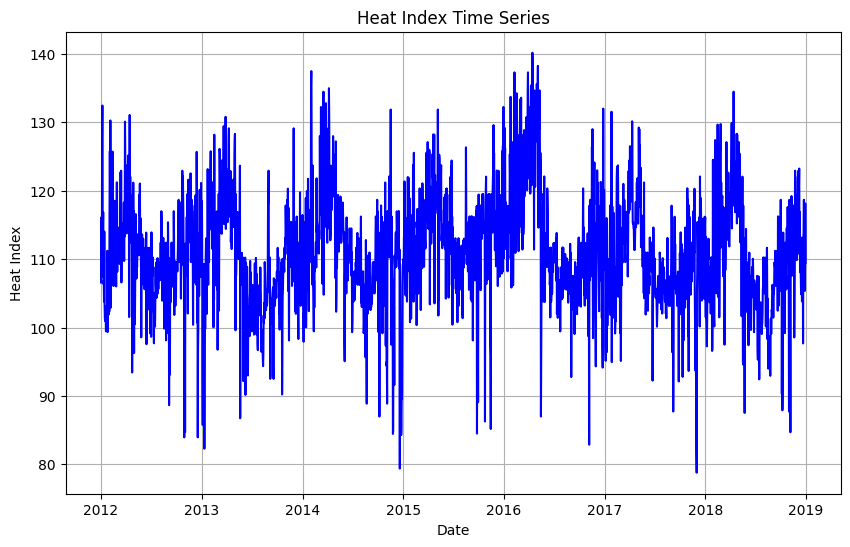

In [ ]:
#plot the time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(combined_data.index, combined_data['heat_index'], color='blue', linestyle='-')
plt.title('Heat Index Time Series')
plt.xlabel('Date')
plt.ylabel('Heat Index')
plt.grid(True)
plt.show()




In [ ]:
#check stationarity of the time series
#perform Augmented Dickey-Fuller Test

#null hyposthesis : time series is non-stationary
#alternative hyposthesis : time series is stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(combined_data['heat_index'])

test_statistic = result[0]
p_value = result[1]

if p_value <= 0.05:
  print('p_value <= 0.05 therefore time series is stationary ')
  print('p_value : ',p_value)
else:
  print('non stationary time series')


p_value <= 0.05 therefore time series is stationary 
p_value :  3.4480778085459306e-05


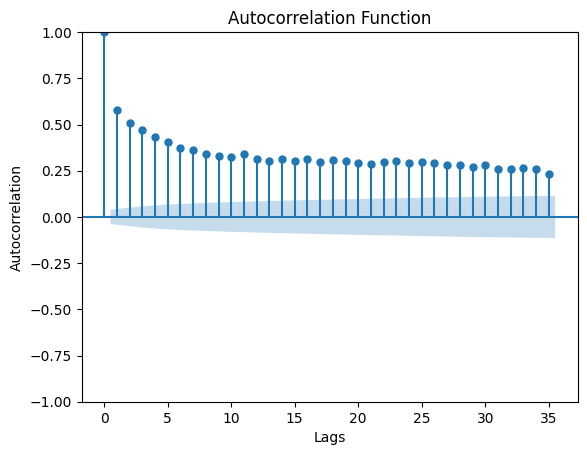

In [ ]:
#identify model parameters
#ACF - Auto correlation function to determine MA(q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(combined_data.heat_index)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

#q = 35

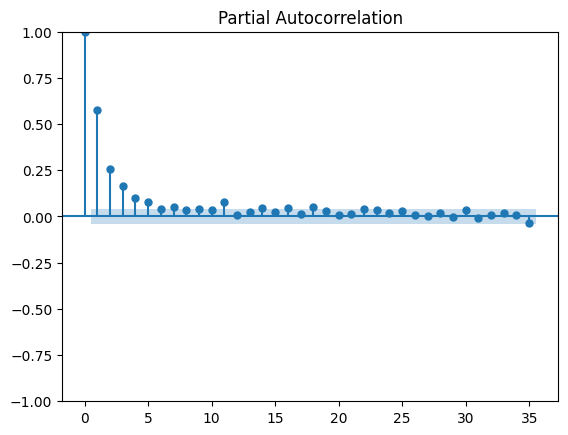

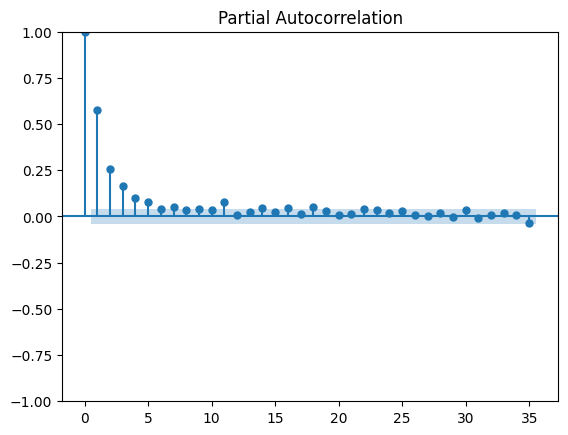

In [ ]:
#PACF - Partial Auto correlation function to determine AR(p) term
plot_pacf(combined_data['heat_index'])

#p = 5

In [ ]:

#split data to training and testing
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(combined_data, test_size = 0.2, shuffle= False)
train_data = train_data.reindex(pd.date_range(start=train_data.index.min(), end=train_data.index.max(), freq='D'))
test_data = test_data.reindex(pd.date_range(start=test_data.index.min(), end=test_data.index.max(), freq='D'))

Model Fitting

In [ ]:
#fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_data, order=(5,0,35))
fitted_model = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             heat_index   No. Observations:                 2046
Model:                ARIMA(5, 0, 35)   Log Likelihood               -6616.528
Date:                Thu, 16 May 2024   AIC                          13317.055
Time:                        18:44:45   BIC                          13553.248
Sample:                    01-01-2012   HQIC                         13403.681
                         - 08-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.5042      1.375     81.068      0.000     108.808     114.200
ar.L1          0.8220      1.675      0.491      0.624      -2.460       4.104
ar.L2         -0.0927      0.653     -0.142      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


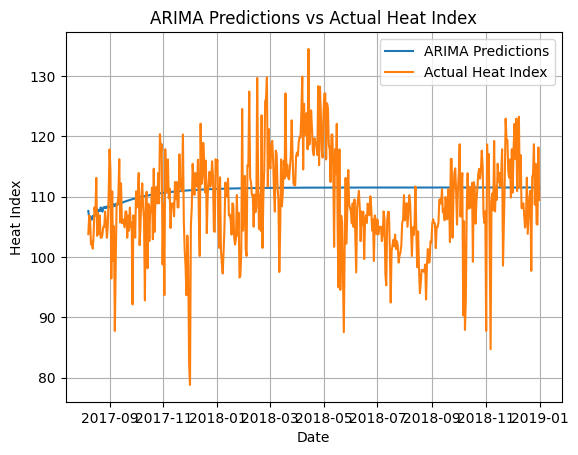

In [ ]:
train, test = train_test_split(combined_data, test_size=0.2, shuffle=False)

start=len(train)
end=len(train)+len(test)-1
pred=fitted_model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# test['heat_index'].plot(legend=True)

# Plotting with 'date' as x-axis
plt.plot(test.index, pred, label='ARIMA Predictions')
plt.plot(test.index, test['heat_index'], label='Actual Heat Index')
plt.xlabel('Date')
plt.ylabel('Heat Index')
plt.title('ARIMA Predictions vs Actual Heat Index')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['heat_index'].mean()
rmse=sqrt(mean_squared_error(pred,test['heat_index']))
print(rmse)

7.89004828309437


<Axes: >

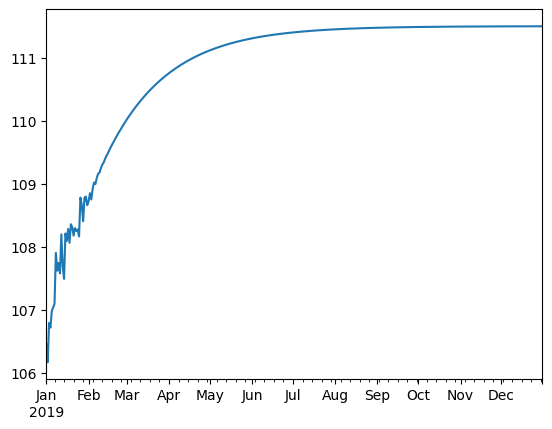

In [ ]:
start_date = '2019-01-01'

end_date = '2019-12-31'

date_range = pd.date_range(start=start_date, end=end_date)

predictions_future = fitted_model.forecast(steps=len(date_range))

predictions_future.index = date_range
predictions_future

# Save the forecast DataFrame as a CSV file
pd.DataFrame(predictions_future).reset_index().to_csv('/content/drive/MyDrive/iot/future_forecast.csv', index=False)

predictions_future.plot()

<Axes: >

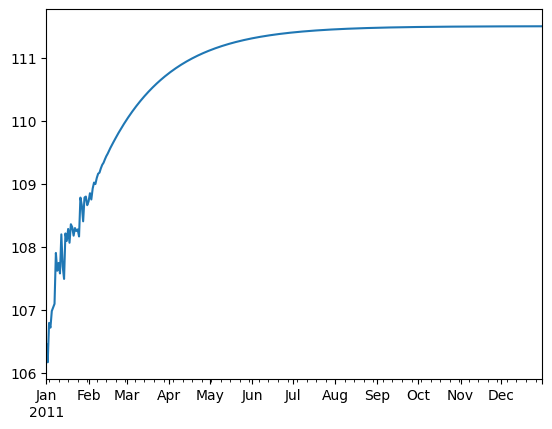

In [ ]:
start_date = '2011-01-01'

end_date = '2011-12-31'

date_range = pd.date_range(start=start_date, end=end_date)

predictions_past = fitted_model.forecast(steps=len(date_range))

predictions_past.index = date_range
predictions_past

# Save the forecast DataFrame as a CSV file
pd.DataFrame(predictions_past).reset_index().to_csv('/content/drive/MyDrive/iot/past_forecast.csv', index=False)

predictions_past.plot()